In [99]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

# US Candy Sales

In [100]:
candy_sales_df = pd.read_csv("../datasets/Candy_Sales.csv")
candy_sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,282,US-2021-128055-CHO-TRI-54000,2021-01-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-FUD-51000,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-MIL-31000,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,3396,US-2022-121391-CHO-MIL-31000,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28


In [101]:
candy_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          10194 non-null  int64  
 1   Order ID        10194 non-null  object 
 2   Order Date      10194 non-null  object 
 3   Ship Date       10194 non-null  object 
 4   Ship Mode       10194 non-null  object 
 5   Customer ID     10194 non-null  int64  
 6   Country/Region  10194 non-null  object 
 7   City            10194 non-null  object 
 8   State/Province  10194 non-null  object 
 9   Postal Code     10194 non-null  object 
 10  Division        10194 non-null  object 
 11  Region          10194 non-null  object 
 12  Product ID      10194 non-null  object 
 13  Product Name    10194 non-null  object 
 14  Sales           10194 non-null  float64
 15  Units           10194 non-null  int64  
 16  Gross Profit    10194 non-null  float64
 17  Cost            10194 non-null 

In [102]:
candy_sales_df.shape

(10194, 18)

In [103]:
candy_sales_df["Row ID"].nunique()

10194

In [104]:
candy_sales_df.describe()

,Row ID,Customer ID,Sales,Units,Gross Profit,Cost
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,5097.500000,134468.961154,13.908537,3.791838,9.166451,4.742087
std,2942.898656,20231.483007,11.341020,2.228317,6.643740,5.061647
min,1.000000,100006.000000,1.250000,1.000000,0.250000,0.600000
25%,2549.250000,117212.000000,7.200000,2.000000,4.900000,2.400000
50%,5097.500000,133550.000000,10.800000,3.000000,7.470000,3.600000
75%,7645.750000,152051.000000,18.000000,5.000000,12.250000,5.700000
max,10194.000000,192314.000000,260.000000,14.000000,130.000000,130.000000


In [105]:
candy_sales_df["Order Date"] = pd.to_datetime(
    candy_sales_df["Order Date"],
    # format="%y-%m-%d",
    # errors="coerce"
)

candy_sales_df["Ship Date"] = pd.to_datetime(candy_sales_df["Ship Date"])

In [106]:
candy_sales_df["Order ID"]
candy_sales_df["Order ID"] == "US-2021-138100-CHO-MIL-31000"

0        False
1        False
2        False
3         True
4        False
         ...  
10189    False
10190    False
10191    False
10192    False
10193    False
Name: Order ID, Length: 10194, dtype: bool

In [107]:
order_id_mask = candy_sales_df["Order ID"] == "US-2024-157987-CHO-NUT-13000"

candy_sales_df[order_id_mask]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
170,8488,US-2024-157987-CHO-NUT-13000,2024-09-02,2030-02-27,Standard Class,157987,United States,New York City,New York,10009,Chocolate,Atlantic,CHO-NUT-13000,Wonka Bar - Nutty Crunch Surprise,6.98,2,4.98,2.0
172,8493,US-2024-157987-CHO-NUT-13000,2024-09-02,2030-02-27,Standard Class,157987,United States,New York City,New York,10009,Chocolate,Atlantic,CHO-NUT-13000,Wonka Bar - Nutty Crunch Surprise,3.49,1,2.49,1.0
174,8499,US-2024-157987-CHO-NUT-13000,2024-09-02,2030-02-27,Standard Class,157987,United States,New York City,New York,10009,Chocolate,Atlantic,CHO-NUT-13000,Wonka Bar - Nutty Crunch Surprise,10.47,3,7.47,3.0
175,8503,US-2024-157987-CHO-NUT-13000,2024-09-02,2030-02-27,Standard Class,157987,United States,New York City,New York,10009,Chocolate,Atlantic,CHO-NUT-13000,Wonka Bar - Nutty Crunch Surprise,27.92,8,19.92,8.0
178,8515,US-2024-157987-CHO-NUT-13000,2024-09-02,2030-02-27,Standard Class,157987,United States,New York City,New York,10009,Chocolate,Atlantic,CHO-NUT-13000,Wonka Bar - Nutty Crunch Surprise,10.47,3,7.47,3.0


## Orders by country

In [108]:
country_orders = candy_sales_df["Country/Region"].value_counts()
country_orders

Country/Region
United States    9994
Canada            200
Name: count, dtype: int64

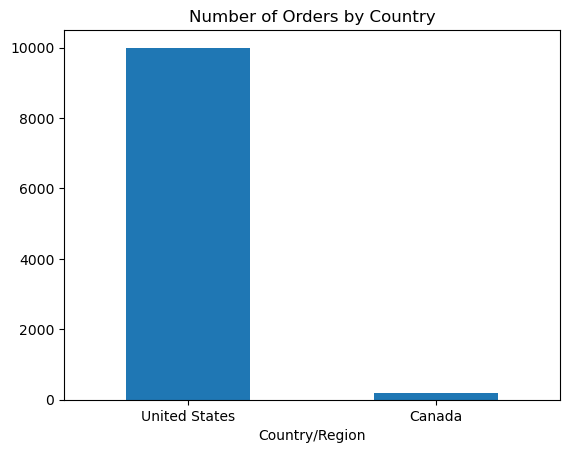

In [109]:
country_orders.plot(kind="bar", title="Number of Orders by Country", rot=0)
plt.show()

## Days to Ship

In [110]:
candy_sales_df["ship_time"] = candy_sales_df["Ship Date"] - candy_sales_df["Order Date"]
candy_sales_df["ship_time"] = candy_sales_df["ship_time"].dt.days

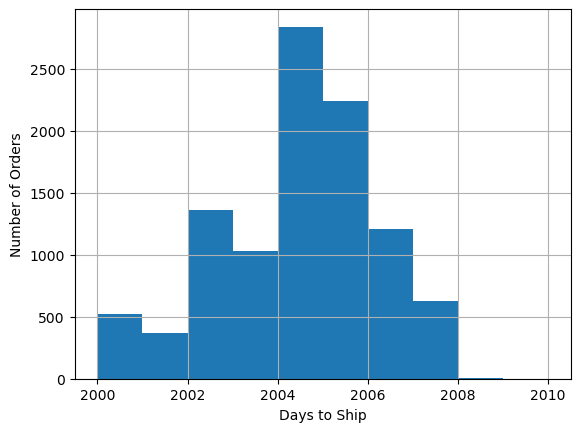

In [111]:
candy_sales_df["ship_time"].hist(range=[2000, 2010], bins=10)
plt.xlabel("Days to Ship")
plt.ylabel("Number of Orders")
plt.show()


## Popular products

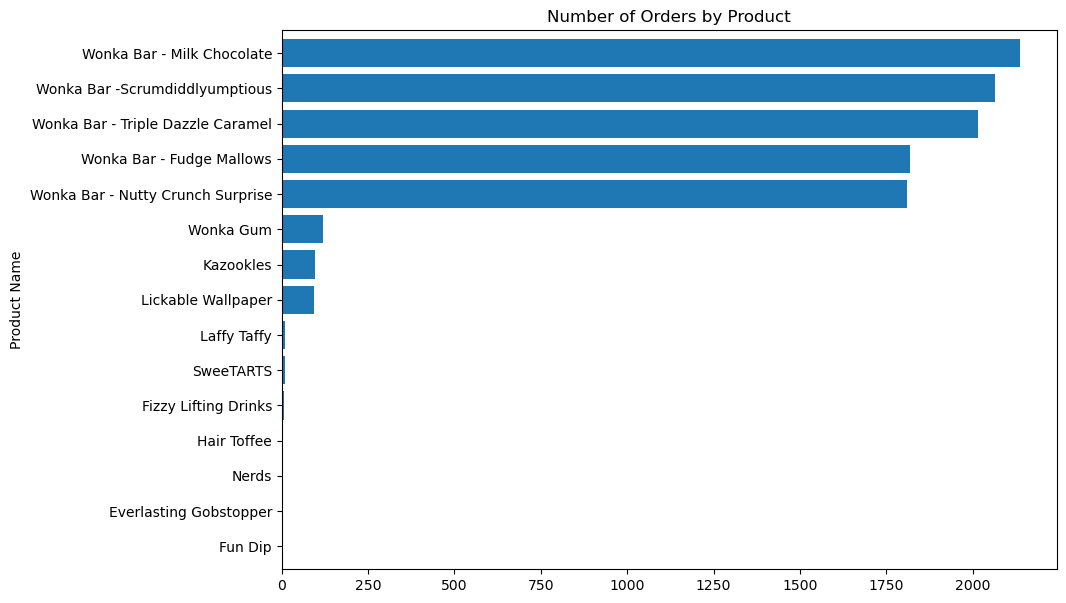

In [112]:
candy_sales_df["Product Name"].value_counts(ascending=True) \
    .plot(kind="barh", figsize=(10, 7), width=0.8)
plt.title("Number of Orders by Product")
plt.show()

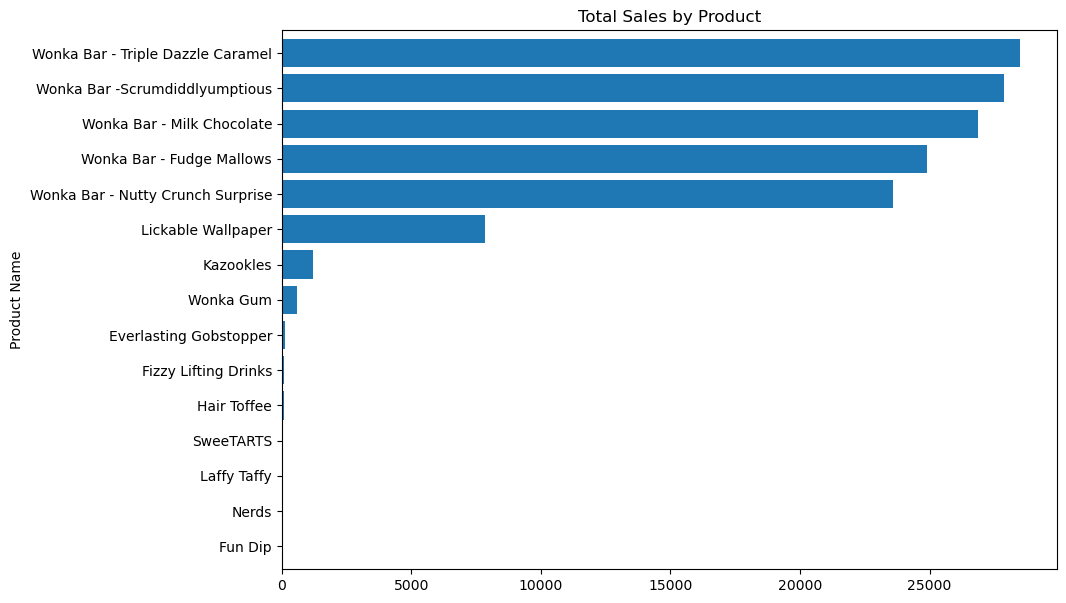

In [113]:
candy_sales_df.groupby("Product Name")["Sales"].sum().sort_values(ascending=True) \
    .plot(kind="barh", figsize=(10, 7), width=0.8)
plt.title("Total Sales by Product")
plt.show()

In [114]:
candy_sales_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Country/Region', 'City', 'State/Province',
       'Postal Code', 'Division', 'Region', 'Product ID', 'Product Name',
       'Sales', 'Units', 'Gross Profit', 'Cost', 'ship_time'],
      dtype='object')

## Sales vs Profit of top 5 products

In [115]:
candy_orders = candy_sales_df["Product Name"].value_counts(ascending=False).reset_index()
top_5_prodcuts = candy_orders.loc[:4, "Product Name"] # subsetting
top_5_prodcuts


0           Wonka Bar - Milk Chocolate
1       Wonka Bar -Scrumdiddlyumptious
2    Wonka Bar - Triple Dazzle Caramel
3            Wonka Bar - Fudge Mallows
4    Wonka Bar - Nutty Crunch Surprise
Name: Product Name, dtype: object

In [116]:
top_5_product_sales = candy_sales_df[candy_sales_df["Product Name"].isin(top_5_prodcuts)]

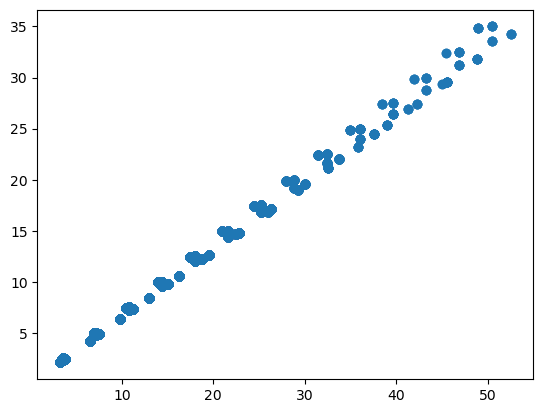

In [117]:
plt.scatter(x=top_5_product_sales["Sales"], y=top_5_product_sales["Gross Profit"])
plt.show()


## 2021 Sales

In [118]:
# Filtering 2021 sales data
candy_sales_df[candy_sales_df["Order Date"].dt.year == 2021]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost,ship_time
0,282,US-2021-128055-CHO-TRI-54000,2021-01-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60,2064
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20,2005
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-FUD-51000,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40,2005
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-MIL-31000,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42,2005
11,387,US-2021-158064-CHO-MIL-31000,2021-04-21,2026-10-16,Standard Class,158064,United States,Los Angeles,California,90008,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,16.25,5,10.55,5.70,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10157,1342,US-2021-151995-CHO-MIL-31000,2021-10-13,2027-04-07,First Class,151995,United States,Edmonds,Washington,98026,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28,2002
10158,2001,US-2021-126802-CHO-SCR-58000,2021-12-29,2027-06-28,Standard Class,126802,United States,Chicago,Illinois,60610,Chocolate,Interior,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,10.80,3,7.50,3.30,2007
10185,981,US-2021-143336-CHO-TRI-54000,2021-08-27,2027-02-22,Second Class,143336,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60,2005
10186,982,US-2021-143336-CHO-TRI-54000,2021-08-27,2027-02-22,Second Class,143336,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,15.00,4,9.80,5.20,2005


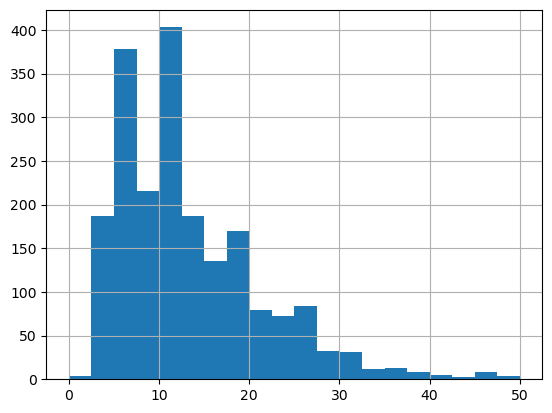

In [119]:
# subsetting dataframe using datetime index
candy_sales_dt_idx = candy_sales_df.set_index("Order Date").sort_index()
sales_2021 = candy_sales_dt_idx.loc["2021"] # date: yyyy-mm-dd, year-month: yyyy-mm, year: yyyy

sales_2021["Sales"].hist(range=[0, 50], bins=20)
plt.show()

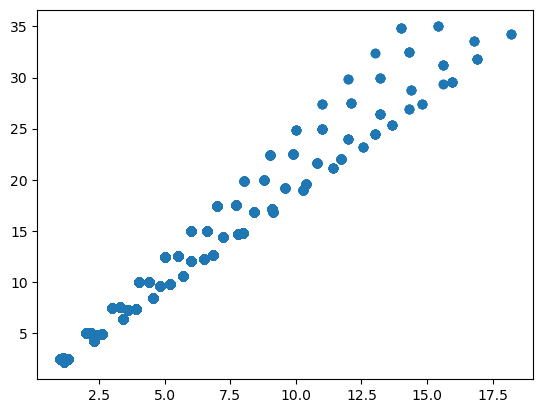

In [120]:
plt.scatter(x=top_5_product_sales["Cost"], y=top_5_product_sales["Gross Profit"])
plt.show()

In [121]:
candy_sales_df["Order Date"].value_counts().sort_index()

Order Date
2021-01-03     1
2021-01-04     3
2021-01-05     1
2021-01-06     9
2021-01-07     2
              ..
2024-12-26     4
2024-12-27     2
2024-12-28    19
2024-12-29    15
2024-12-30     8
Name: count, Length: 1242, dtype: int64

## Load data

In [122]:
factories_df = pd.read_csv("../datasets/Candy_Factories.csv")
products_df = pd.read_csv("../datasets/Candy_Products.csv")
targets_df = pd.read_csv("../datasets/Candy_Targets.csv")
uszips_df = pd.read_csv("../datasets/uszips.csv")

In [123]:
uszips_df.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16834.0,100.9,72001,Adjuntas,"{""72001"": 98.74, ""72141"": 1.26}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37642.0,479.2,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,49075.0,551.7,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5590.0,48.7,72093,Maricao,"{""72093"": 82.27, ""72153"": 11.66, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,25542.0,265.7,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.82, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [124]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Division      23 non-null     object 
 1   Product Name  18 non-null     object 
 2   Factory       23 non-null     object 
 3   Product ID    23 non-null     object 
 4   Unit Price    21 non-null     object 
 5   Unit Cost     23 non-null     float64
dtypes: float64(1), object(5)
memory usage: 1.3+ KB


## Data cleaning

In [127]:
products_df

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,$3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,$3.6,1.20
2,Chocolate,Wonka Bar - Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,$3.6,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,$3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,$3.75,1.30
5,Sugar,Laffy Taffy,Sugar Shack,SUG-LAF-25000,$1.99,0.75
6,Sugar,SweeTARTS,Sugar Shack,SUG-SWE-91000,$1.5,0.80
7,Sugar,Nerds,Sugar Shack,SUG-NER-92000,$1.5,0.80
8,Sugar,Fun Dip,Sugar Shack,SUG-FUN-75000,$1.5,0.90
9,Other,Fizzy Lifting Drinks,Sugar Shack,OTH-FIZ-56000,$3.75,1.50


In [143]:
products_df = products_df.drop_duplicates(
    subset=["Division", "Factory", "Product ID", "Unit Price", "Unit Cost"],
    keep="last"
)

products_df = products_df.replace("''", np.nan).dropna(subset=["Product Name"])

products_df["Unit Price"] = products_df["Unit Price"].str.replace("$", "").astype(float)

products_df

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar - Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30
5,Sugar,Laffy Taffy,Sugar Shack,SUG-LAF-25000,1.99,0.75
6,Sugar,SweeTARTS,Sugar Shack,SUG-SWE-91000,1.50,0.80
7,Sugar,Nerds,Sugar Shack,SUG-NER-92000,1.50,0.80
8,Sugar,Fun Dip,Sugar Shack,SUG-FUN-75000,1.50,0.90
9,Other,Fizzy Lifting Drinks,Sugar Shack,OTH-FIZ-56000,3.75,1.50
